In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import scipy.sparse as sp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### data preprocessing

In [2]:
df = pd.read_csv('emails_cleaned.csv')
df.head()

,label,email_id,text,length,num_special_chars
0,spam,1,naturally irresistible your corporate identity...,1475,135
1,spam,2,the stock trading gunslinger fanny is merrill...,589,0
2,spam,3,unbelievable new homes made easy im wanting t...,439,7
3,spam,4,4 color printing special request additional i...,491,24
4,spam,5,"do not have money , get software cds from here...",226,12


In [3]:
df['label'].value_counts()

label
ham     4358
spam    1368
Name: count, dtype: int64

In [4]:
df[df['label'] == 'ham']

,label,email_id,text,length,num_special_chars
1368,ham,1369,"hello guys , i ' m "" bugging you "" for your c...",1179,50
1369,ham,1370,sacramento weather station fyi - - - - - - -...,1988,125
1370,ham,1371,from the enron india newsdesk - jan 18 th news...,7893,255
1371,ham,1372,re : powerisk 2001 - your invitation angelika...,3635,111
1372,ham,1373,re : resco database and customer capture stev...,5526,299
...,...,...,...,...,...
5721,ham,5726,re : research and development charges to gpg ...,1180,112
5722,ham,5727,"re : receipts from visit jim , thanks again ...",1158,70
5723,ham,5728,re : enron case study update wow ! all on the...,2122,176
5724,ham,5729,"re : interest david , please , call shirley ...",1051,112


In [5]:
for i in range (0,10):
    print(df['text'][i])

naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing br

In [6]:
df['num_special_chars'].value_counts()

num_special_chars
9       132
12      131
10      123
7       121
14      102
       ... 
1126      1
1668      1
333       1
477       1
412       1
Name: count, Length: 439, dtype: int64

In [7]:
# Télécharger les ressources nécessaires pour NLTK
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('punkt_tab')

# Prétraitement textuel avec NLTK
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))  # Liste des mots vides en anglais
    tokens = word_tokenize(text.lower())  # Tokenisation et mise en minuscule
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Retirer les mots vides et les caractères spéciaux
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(preprocess_text)
df.head()

,label,email_id,text,length,num_special_chars
0,spam,1,naturally irresistible corporate identity lt r...,1475,135
1,spam,2,stock trading gunslinger fanny merrill muzo co...,589,0
2,spam,3,unbelievable new homes made easy im wanting sh...,439,7
3,spam,4,4 color printing special request additional in...,491,24
4,spam,5,money get software cds software compatibility ...,226,12


In [8]:
import numpy as np
import scipy.sparse as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Vectorisation des textes avec TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_text_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Standardisation des colonnes length et num_special_chars
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[['length', 'num_special_chars']])

# Combinaison des données textuelles et numériques
X = sp.hstack((X_text_tfidf, X_numerical))

# Vérifier si des valeurs négatives sont présentes dans X
if np.any(X.toarray() < 0):  # Conversion de la matrice creuse en dense pour la vérification
    print("Attention : des valeurs négatives sont présentes dans X!")
    # Remplacer les valeurs négatives par zéro
    X = sp.csr_matrix(np.maximum(0, X.toarray()))  # Utilisation de csr_matrix pour conserver un format creux
else:
    print("Aucune valeur négative dans X.")

# Labels (target variable)
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)  # Convertir spam en 1 et ham en 0

# Division des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de test :", X_test.shape)

Attention : des valeurs négatives sont présentes dans X!
Taille du jeu d'entraînement : (4580, 37035)
Taille du jeu de test : (1146, 37035)


In [9]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

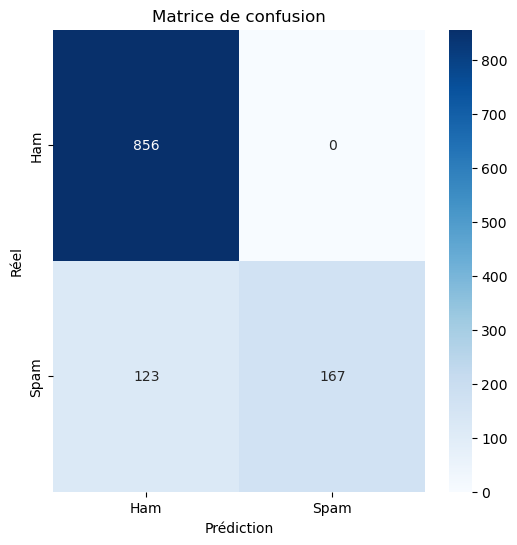

Rapport de classification :
               precision    recall  f1-score   support

         Ham       0.87      1.00      0.93       856
        Spam       1.00      0.58      0.73       290

    accuracy                           0.89      1146
   macro avg       0.94      0.79      0.83      1146
weighted avg       0.91      0.89      0.88      1146



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions sur le jeu de test
y_pred = nb_model.predict(X_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Rapport de classification : Précision, Rappel, et F1-Score
report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print("Rapport de classification :\n", report)

#### print the 10 words witch have hightest probabilities to be a spam class and a ham class

In [12]:
log_prob = nb_model.feature_log_prob_
# Récupérer les mots du TfidfVectorizer
words = tfidf_vectorizer.get_feature_names_out()

# Extraire les probabilités pour la partie textuelle uniquement
num_text_features = len(words)  # Nombre de mots dans le vocabulaire
log_prob_text = log_prob[:, :num_text_features]  # Exclure les colonnes numériques

# Identifier les 10 mots les plus probables pour chaque classe
top_spam_indices = np.argsort(log_prob_text[1])[-10:]  # Classe "spam"
top_ham_indices = np.argsort(log_prob_text[0])[-10:]   # Classe "ham"

# Obtenir les mots correspondants
top_spam_words = [(words[i], np.exp(log_prob_text[1][i])) for i in top_spam_indices]
top_ham_words = [(words[i], np.exp(log_prob_text[0][i])) for i in top_ham_indices]

# Afficher les résultats
print("Top 10 mots pour la classe spam :")
for word, prob in reversed(top_spam_words):
    print(f"{word}: {prob:.4f}")

print("\nTop 10 mots pour la classe ham :")
for word, prob in reversed(top_ham_words):
    print(f"{word}: {prob:.4f}")


Top 10 mots pour la classe spam :
software: 0.0006
website: 0.0006
click: 0.0006
money: 0.0005
business: 0.0005
save: 0.0005
adobe: 0.0005
com: 0.0005
company: 0.0004
online: 0.0004

Top 10 mots pour la classe ham :
ect: 0.0031
enron: 0.0029
vince: 0.0024
hou: 0.0016
kaminski: 0.0014
2000: 0.0014
would: 0.0013
please: 0.0013
com: 0.0012
subject: 0.0011


In [13]:
top_spam_words

[('online', 0.00043504715502258503),
 ('company', 0.0004351265473072291),
 ('com', 0.0004511005496747135),
 ('adobe', 0.00046174618709354304),
 ('save', 0.00048800191401700884),
 ('business', 0.000511665750457166),
 ('money', 0.0005486396968899295),
 ('click', 0.0005643310511294638),
 ('website', 0.0005972084886856825),
 ('software', 0.0006259523030334043)]

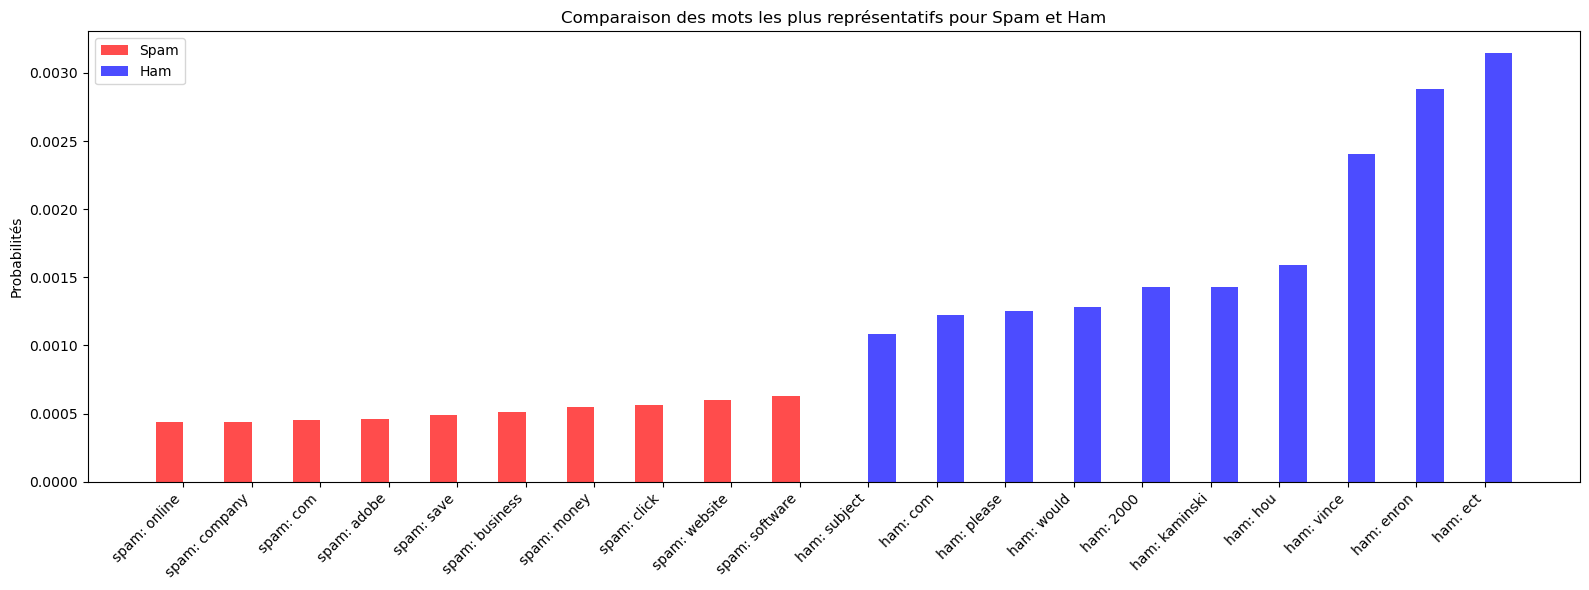

In [14]:
# Extraire les mots et leurs probabilités pour les deux classes
spam_words, spam_probs = zip(*top_spam_words)
ham_words, ham_probs = zip(*top_ham_words)

# Fusionner les mots des deux classes pour l'axe des x
all_words = [f"spam: {word}" for word in spam_words] + [f"ham: {word}" for word in ham_words]
all_probs_spam = list(spam_probs) + [0] * len(ham_words)  # Probabilités pour spam (ham à 0)
all_probs_ham = [0] * len(spam_words) + list(ham_probs)  # Probabilités pour ham (spam à 0)

# Définir la taille de la figure
plt.figure(figsize=(16, 6))

# Graphique en barres pour les deux classes
x_indices = np.arange(len(all_words))
plt.bar(x_indices - 0.2, all_probs_spam, width=0.4, label='Spam', color='red', alpha=0.7)
plt.bar(x_indices + 0.2, all_probs_ham, width=0.4, label='Ham', color='blue', alpha=0.7)

# Ajouter les labels et le titre
plt.xticks(x_indices, all_words, rotation=45, ha='right', fontsize=10)
plt.ylabel('Probabilités')
plt.title('Comparaison des mots les plus représentatifs pour Spam et Ham')
plt.legend()

# Ajustement pour éviter le chevauchement des étiquettes
plt.tight_layout()

# Afficher le graphique
plt.show()


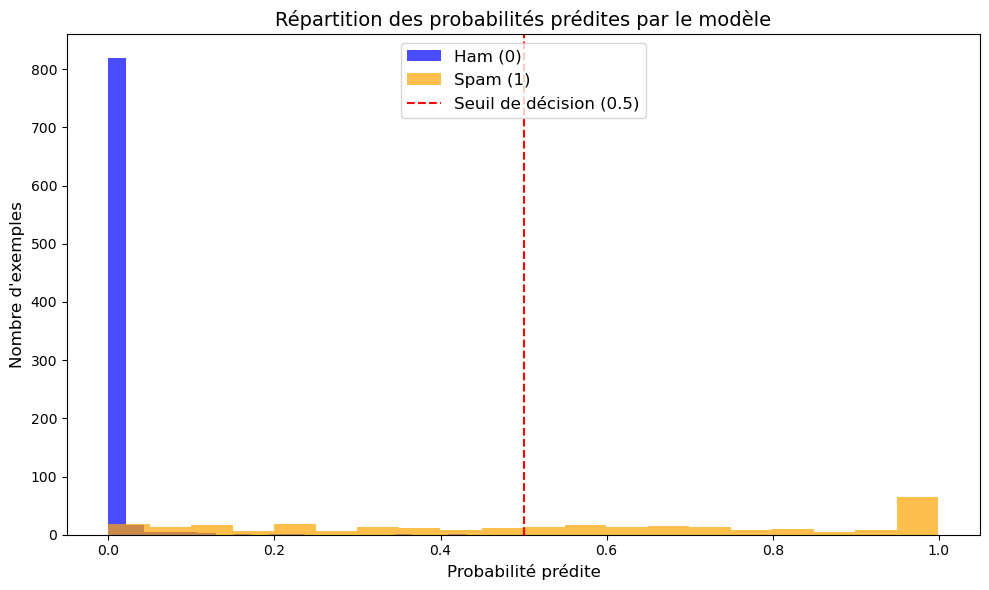

In [15]:
# Obtenir les probabilités prédites pour la classe "spam" (index 1)
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

# Créer un histogramme pour chaque classe
plt.figure(figsize=(10, 6))
plt.hist(y_pred_prob[y_test == 0], bins=20, alpha=0.7, label='Ham (0)', color='blue')
plt.hist(y_pred_prob[y_test == 1], bins=20, alpha=0.7, label='Spam (1)', color='orange')

# Ajouter une ligne verticale pour le seuil de décision (0.5 par défaut)
plt.axvline(x=0.5, color='red', linestyle='--', label='Seuil de décision (0.5)')

# Ajouter des légendes et des annotations
plt.title("Répartition des probabilités prédites par le modèle", fontsize=14)
plt.xlabel("Probabilité prédite", fontsize=12)
plt.ylabel("Nombre d'exemples", fontsize=12)
plt.legend(loc='upper center', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


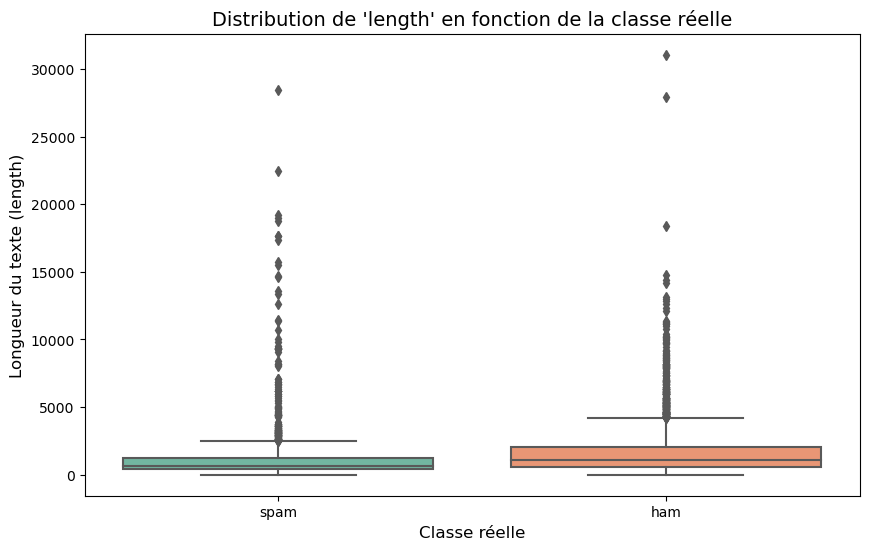

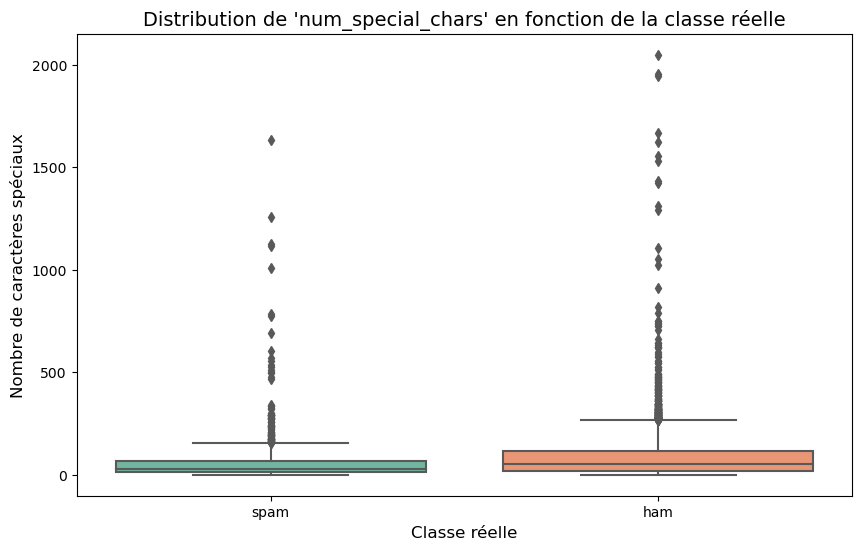

In [16]:
df['predicted'] = nb_model.predict(X)

# Boîte à moustaches pour 'length'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='length', palette="Set2")
plt.title("Distribution de 'length' en fonction de la classe réelle", fontsize=14)
plt.xlabel("Classe réelle", fontsize=12)
plt.ylabel("Longueur du texte (length)", fontsize=12)
plt.show()

# Boîte à moustaches pour 'num_special_chars'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='num_special_chars', palette="Set2")
plt.title("Distribution de 'num_special_chars' en fonction de la classe réelle", fontsize=14)
plt.xlabel("Classe réelle", fontsize=12)
plt.ylabel("Nombre de caractères spéciaux", fontsize=12)
plt.show()

In [17]:
# Obtenir les prédictions
y_pred = nb_model.predict(X_test)

# Identifier les indices des erreurs
errors_indices = (y_test != y_pred).to_numpy().nonzero()[0]

# Sélectionner 5 exemples d'erreurs
error_samples = df.iloc[errors_indices[:5]]

# Afficher les erreurs
print("Exemples d'emails mal classés :")
error_samples[['text', 'length', 'num_special_chars', 'label', 'predicted']]

Exemples d'emails mal classés :


,text,length,num_special_chars,label,predicted
5,great nnews hello welcome medzonline sh ground...,469,9,spam,1
9,save money buy getting thing tried cialls yet ...,437,12,spam,1
12,brighten teeth get teeth bright white consider...,870,19,spam,0
20,med girl happy girl unsatisfied potency wait f...,340,11,spam,1
34,ms 2003 software titles available download opt...,1981,106,spam,1


In [18]:
import joblib

# Sauvegarder les objets utilisés lors de l'entraînement
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(nb_model, "spam_model.pkl")


['spam_model.pkl']